In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Pokemon.csv', index_col=0)

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
ID,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


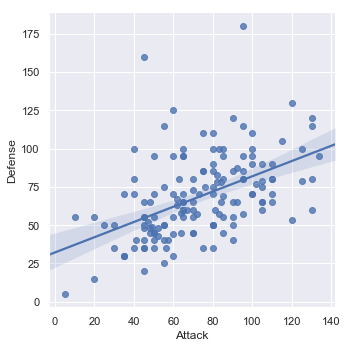

In [4]:
sns.set(style="darkgrid")
sns.lmplot(x='Attack', y='Defense', data=df)

(0, 142.0200544906389)

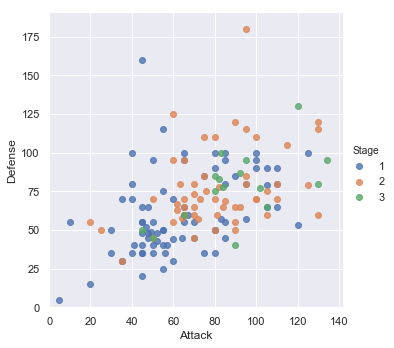

In [5]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage
plt.ylim(0, None)
plt.xlim(0, None)

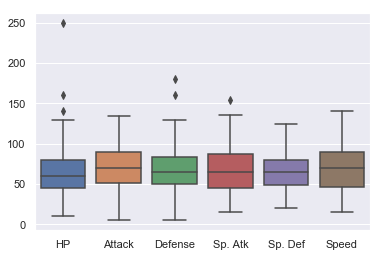

In [7]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)

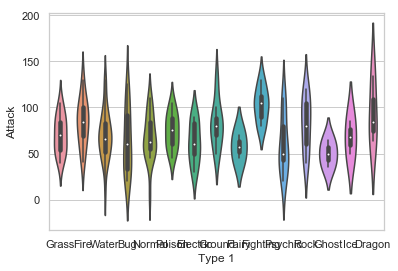

In [8]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

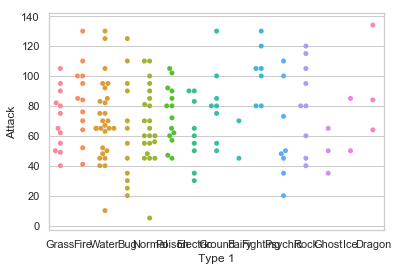

In [11]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df)

Text(0.5,1,'Attack by Type')

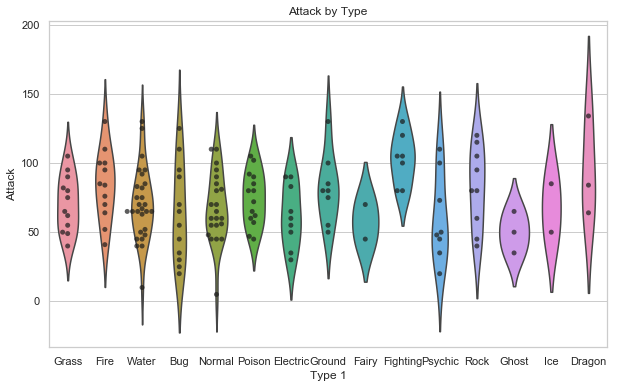

In [14]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', 
              alpha=0.7) 
 
# Set title with matplotlib
plt.title('Attack by Type')

In [15]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
ID,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [16]:
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


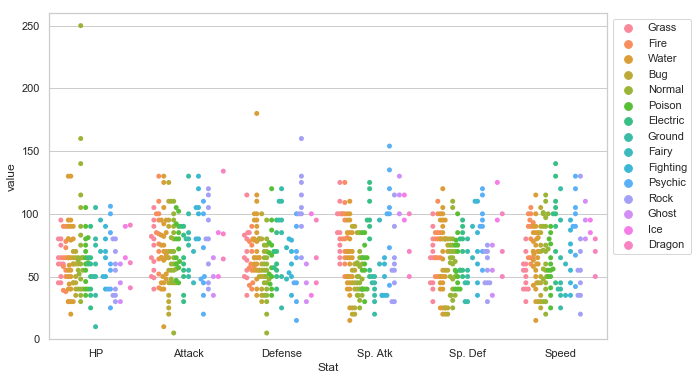

In [19]:
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True) #
 
# y-axis
plt.ylim(0, 260)
 
# legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

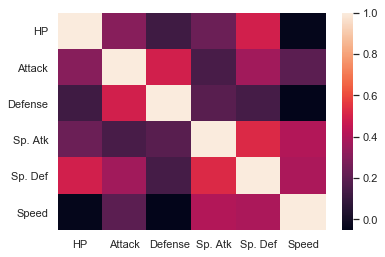

In [20]:
corr = stats_df.corr()
 
# heatmap
sns.heatmap(corr)

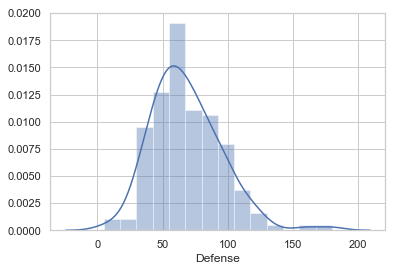

In [22]:
sns.distplot(df.Defense)

Text(0.5,1,'Attack & Defense')

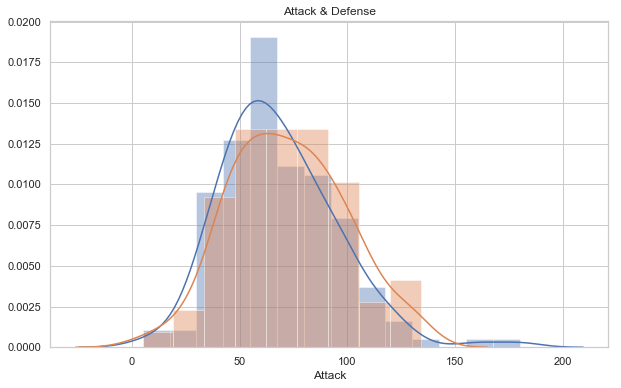

In [26]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.distplot(df.Defense)
 
sns.distplot(df.Attack)
 
# Set title with matplotlib
plt.title('Attack & Defense')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

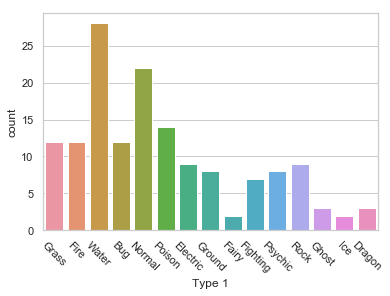

In [30]:
sns.countplot(x='Type 1', data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

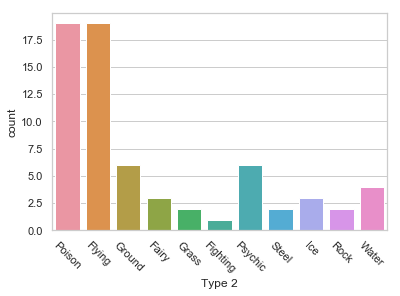

In [31]:
sns.countplot(x='Type 2', data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)

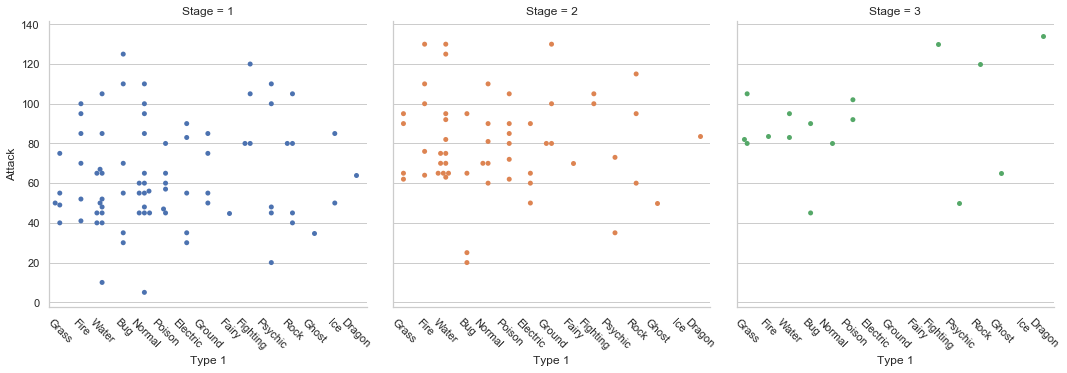

In [33]:
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 

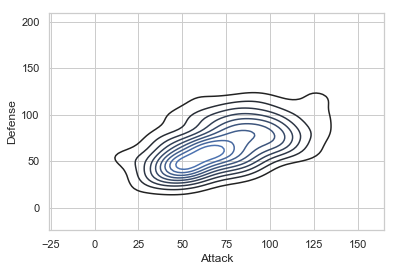

In [34]:
sns.kdeplot(df.Attack, df.Defense)

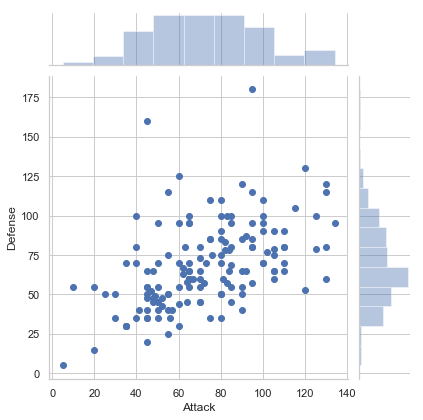

In [35]:
sns.jointplot(x='Attack', y='Defense', data=df)